In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[*********************100%***********************]  1 of 1 completed


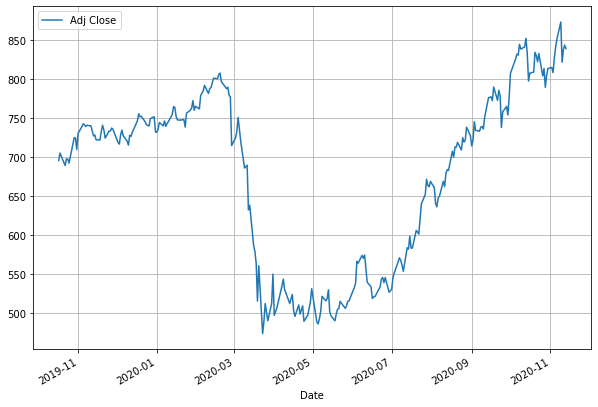

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-09,859.0,877.000000,855.250000,872.750000,872.750000,4297119
2020-11-10,872.0,872.000000,819.099976,821.299988,821.299988,6889383
2020-11-11,820.0,840.650024,812.450012,837.500000,837.500000,5387431
2020-11-12,837.0,848.000000,834.549988,843.250000,843.250000,3150886
2020-11-13,838.0,845.700012,833.349976,838.849976,838.849976,2839192


In [2]:
df = yf.download('TECHM.NS','2019-10-17', '2020-11-17')
df['Adj Close'].plot(figsize=(10,7))
plt.legend()
plt.grid()
plt.show()
df.tail()

In [3]:
df.loc['2020-11-13',:]

Open         8.380000e+02
High         8.457000e+02
Low          8.333500e+02
Close        8.388500e+02
Adj Close    8.388500e+02
Volume       2.839192e+06
Name: 2020-11-13 00:00:00, dtype: float64

In [4]:
df.loc['2020-03-23',:]

Open         5.400000e+02
High         5.420000e+02
Low          4.714000e+02
Close        4.872000e+02
Adj Close    4.742453e+02
Volume       2.912669e+06
Name: 2020-03-23 00:00:00, dtype: float64

In [5]:
df['daily_pct_change'] = df['Adj Close'].pct_change()
mu = df['daily_pct_change'].iloc[:-252].mean()
sigma = df['daily_pct_change'].iloc[:-252].std()

# Creating the random walk simulation of the probable price path
simulation = {}
simulation['Actual'] = list(df['Adj Close'].iloc[-252:].values)

for sim in range(1,25): # Taking 25 paths
    simulation["Simulation_"+str(sim)] = [df['Adj Close'].iloc[-252]]
    for days in range(251):
        next_day = simulation["Simulation_"+str(sim)][-1]*(1+mu+sigma*np.random.normal())
        simulation["Simulation_"+str(sim)].append(next_day)

Text(0, 0.5, 'Price')

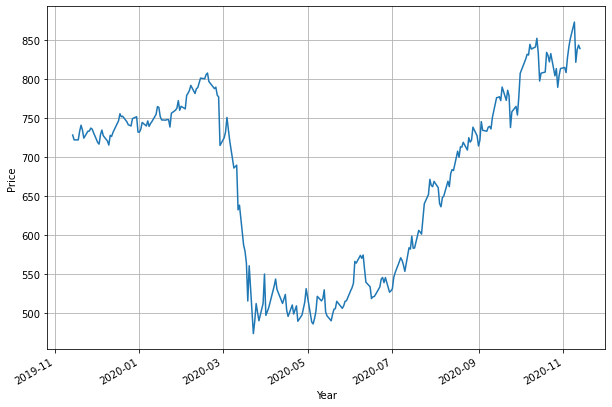

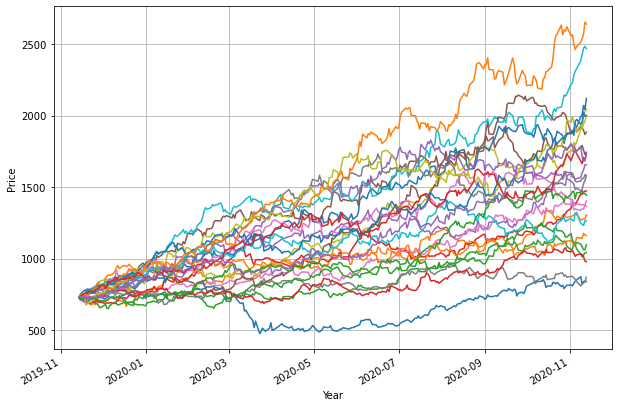

In [6]:
df['Adj Close'][-252:].plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')

# Plotting the simulation of random walk

simulation=pd.DataFrame(simulation)
simulation.index=df[-252:].index
simulation.plot(figsize=(10,7),grid=True,legend=False)
plt.xlabel('Year')
plt.ylabel('Price')

In [7]:
simulation

,Actual,Simulation_1,Simulation_2,Simulation_3,Simulation_4,Simulation_5,Simulation_6,Simulation_7,Simulation_8,Simulation_9,...,Simulation_15,Simulation_16,Simulation_17,Simulation_18,Simulation_19,Simulation_20,Simulation_21,Simulation_22,Simulation_23,Simulation_24
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-14,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,...,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860,728.268860
2019-11-15,722.122742,721.043572,732.766399,717.304927,723.138635,710.119801,707.877783,721.037017,740.896468,742.344838,...,738.173096,734.381013,729.370796,732.225063,738.037937,751.361445,747.688338,714.217160,735.744580,732.387011
2019-11-18,721.978638,707.605161,718.239244,727.074429,736.250952,733.203502,733.947485,702.744123,732.431225,753.717666,...,755.681204,743.380317,730.565230,730.816388,744.616510,777.995923,748.826640,723.015247,756.890030,731.024723
2019-11-19,732.878479,683.537918,706.567565,733.496606,738.995515,758.677218,741.499536,694.022048,745.379680,757.541072,...,755.129152,739.983243,748.762863,675.328829,769.404286,779.393959,745.571036,724.023747,759.027912,723.348272
2019-11-20,740.801208,692.467586,732.534871,737.042933,758.097031,740.064221,729.498123,717.643260,769.651806,765.299060,...,784.017546,744.412846,788.668598,684.588954,777.508216,761.790289,747.328146,718.147357,755.360124,717.446113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-09,872.750000,1269.362456,1101.464214,1452.996271,1566.548636,1775.677497,1336.745827,808.434793,1905.296709,2385.387197,...,1922.506097,1378.345392,1542.714793,1935.556515,1245.241800,1940.172674,2516.240878,1461.076642,1680.914185,1786.489336
2020-11-10,821.299988,1272.470616,1082.097699,1448.790819,1601.613316,1791.571976,1347.903429,824.456303,1924.837101,2429.427705,...,1915.071137,1374.544320,1559.080556,1909.526015,1240.188159,1957.899222,2539.044073,1475.967127,1664.381377,1710.692802
2020-11-11,837.500000,1279.686741,1061.574490,1464.857894,1619.562163,1759.648795,1346.332588,826.568188,2000.186343,2471.242651,...,1898.124686,1377.571397,1561.179106,1943.121470,1230.905146,2024.957310,2570.365998,1456.383564,1708.680698,1680.531949


In [8]:
#simulation.to_csv('out.csv')